In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as km
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_m = pd.read_csv("Mall_Customers.csv")

In [3]:
df_m.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df_m.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df_m.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

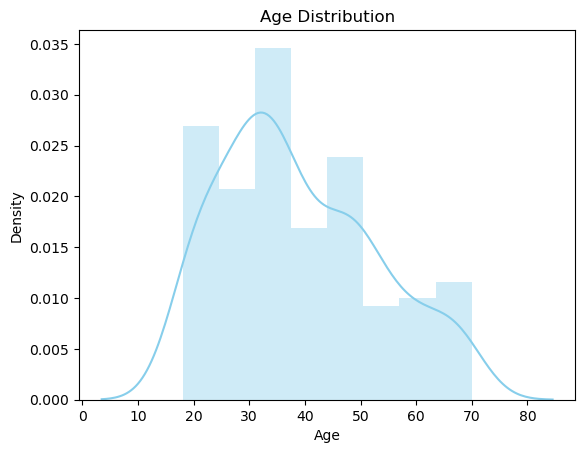

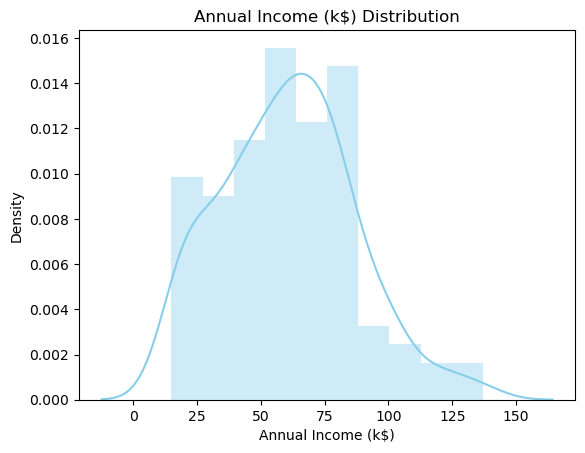

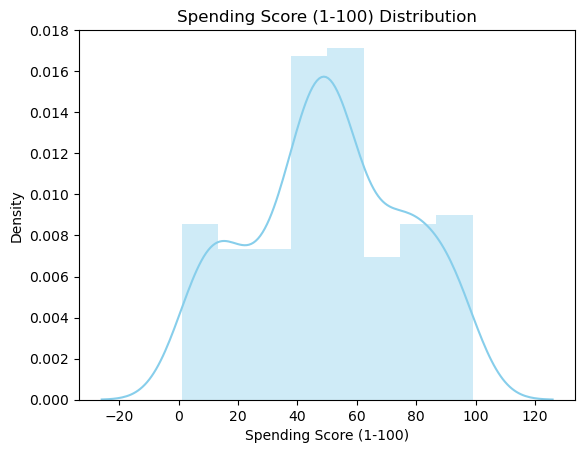

In [6]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for c in col:
    plt.figure()
    sns.distplot(df_m[c],color='skyblue')
    plt.title(f"{c} Distribution")
    plt.show()
            

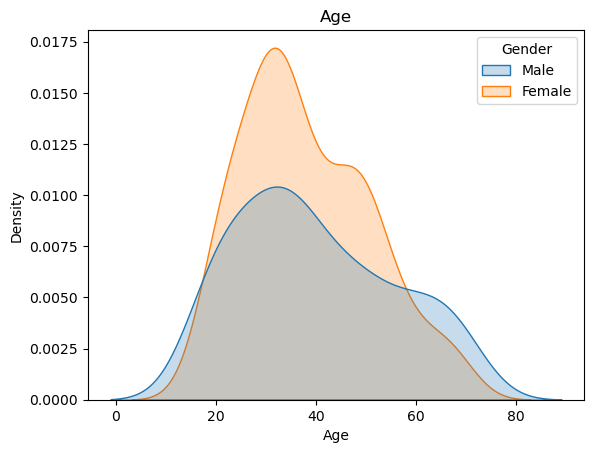

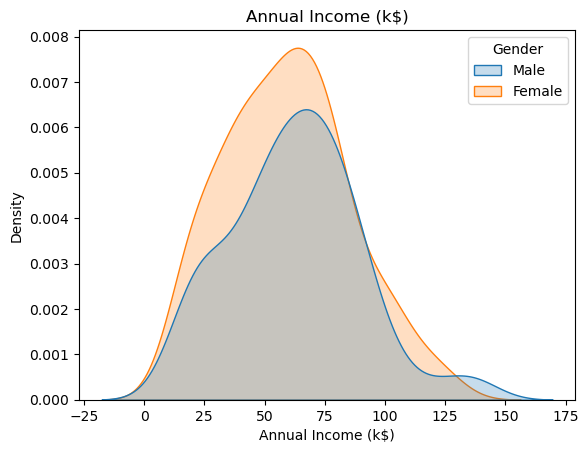

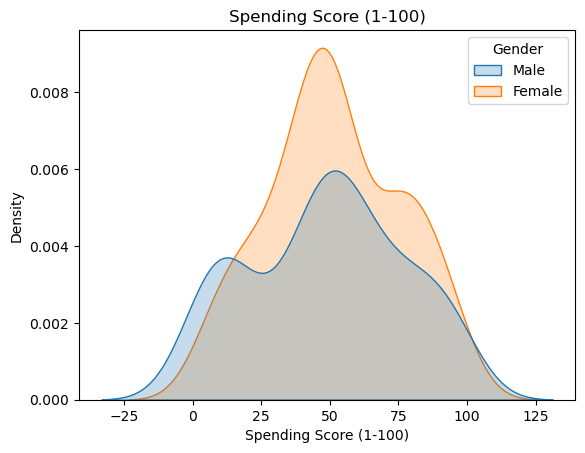

In [7]:
for c in col:
    plt.figure()
    sns.kdeplot(df_m[c],shade=True,hue=df_m["Gender"])
    plt.title(f"{c}")
    plt.show()

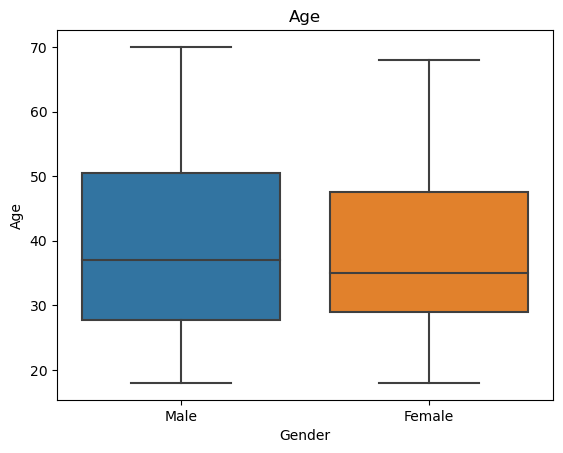

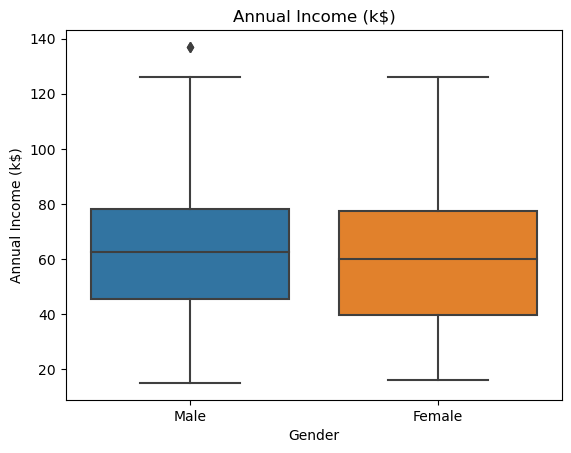

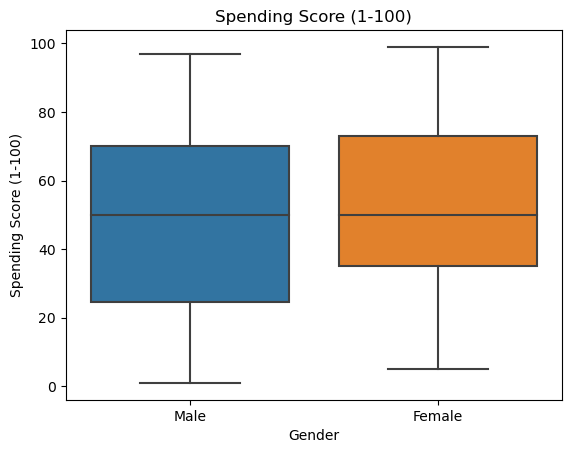

In [8]:
for c in col:
    plt.figure()
    sns.boxplot(data=df_m,x="Gender",y=c)
    plt.title(f"{c}")
    plt.show()

In [9]:
df_m["Gender"].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

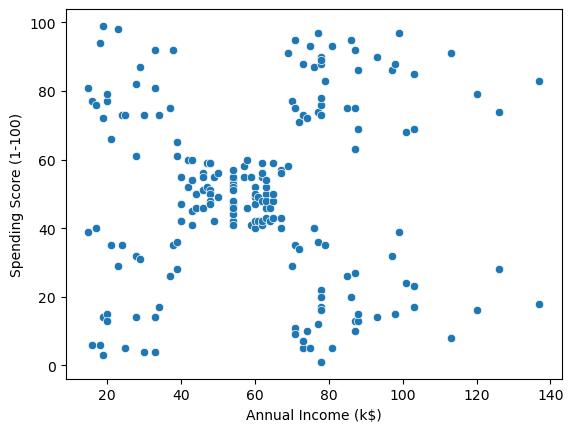

In [10]:
sns.scatterplot(data=df_m,x="Annual Income (k$)",y="Spending Score (1-100)")
plt.show()
plt.close()

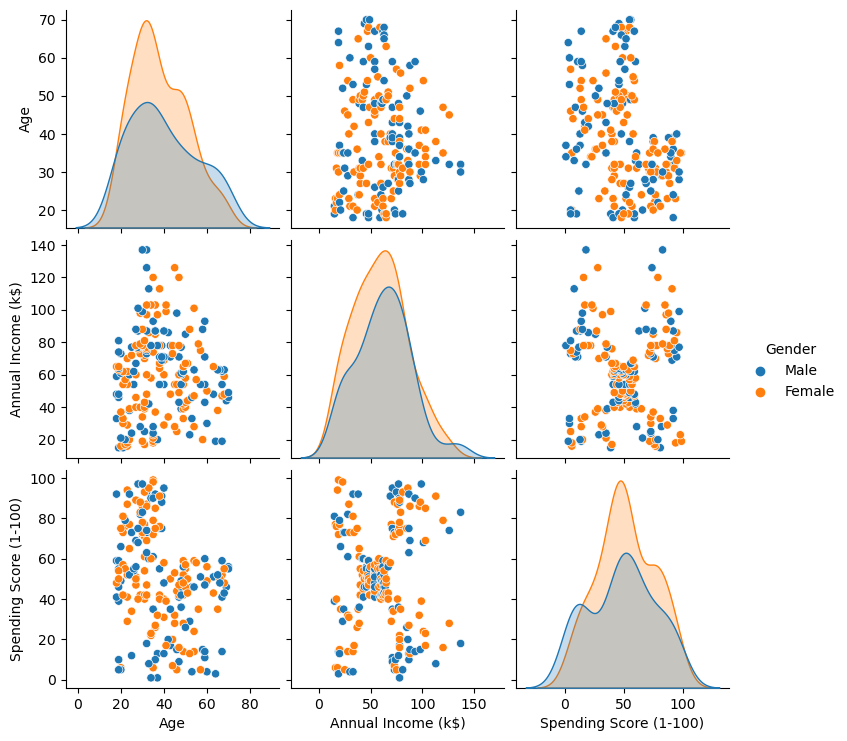

In [11]:
df_m1 = df_m.drop('CustomerID',axis=1)
sns.pairplot(df_m1,hue="Gender")

In [12]:
df_m.groupby(["Gender"])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [13]:
df_m1.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

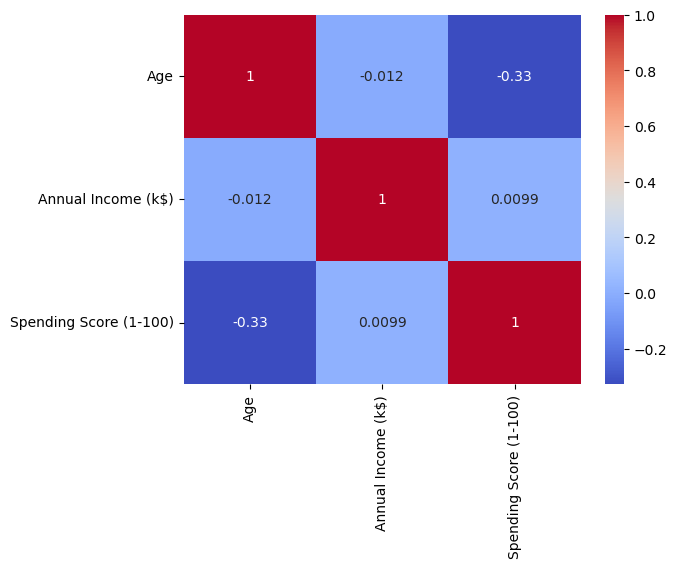

In [14]:
sns.heatmap(df_m1.corr(),annot=True,cmap='coolwarm')

## Clustering - Univariate,Bivariate

In [15]:
clust1 = km(n_clusters=3)

In [16]:
clust1.fit(df_m[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [17]:
clust1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [18]:
df_m["Income Cluster"] = clust1.labels_
df_m.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [19]:
df_m['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [20]:
clust1.inertia_

23517.330930930933

In [21]:
inertia_scores=[]
for i in range(1,11):
    kmean = km(n_clusters=i)
    kmean.fit(df_m[["Annual Income (k$)"]])
    inertia_scores.append(kmean.inertia_)
inertia_scores   

[137277.28000000003,
 48660.88888888889,
 23528.152173913044,
 13278.112713472485,
 8595.715599343184,
 5081.484660267269,
 3962.567993600602,
 2822.4996947496948,
 2220.634126984127,
 1734.1677489177487]

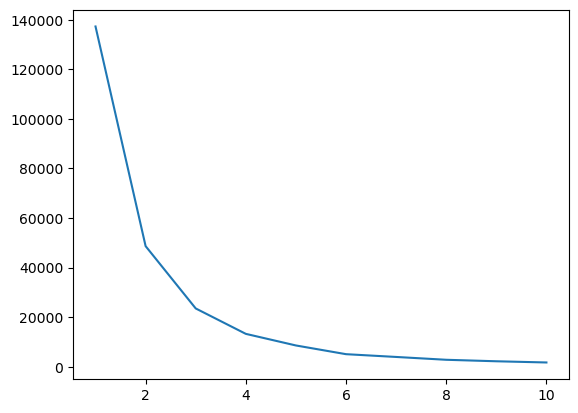

In [22]:
plt.plot(range(1,11),inertia_scores)

In [25]:
df_m.groupby('Income Cluster')['Age',"Annual Income (k$)","Spending Score (1-100)"].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


## Bivariate Clustering

In [41]:
clust2 = km(n_clusters=5)
clust2.fit(df_m[["Annual Income (k$)","Spending Score (1-100)"]])
df_m["Spending and Income Cluster"] = clust2.labels_
df_m.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,3


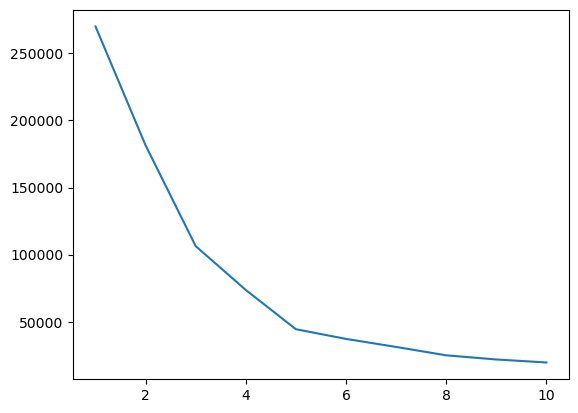

In [42]:
inertia_scores2=[]
for i in range(1,11):
    kmean = km(n_clusters=i)
    kmean.fit(df_m[["Annual Income (k$)","Spending Score (1-100)"]])
    inertia_scores2.append(kmean.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [46]:
cent = pd.DataFrame(clust2.cluster_centers_)
cent.columns = ["x","y"]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

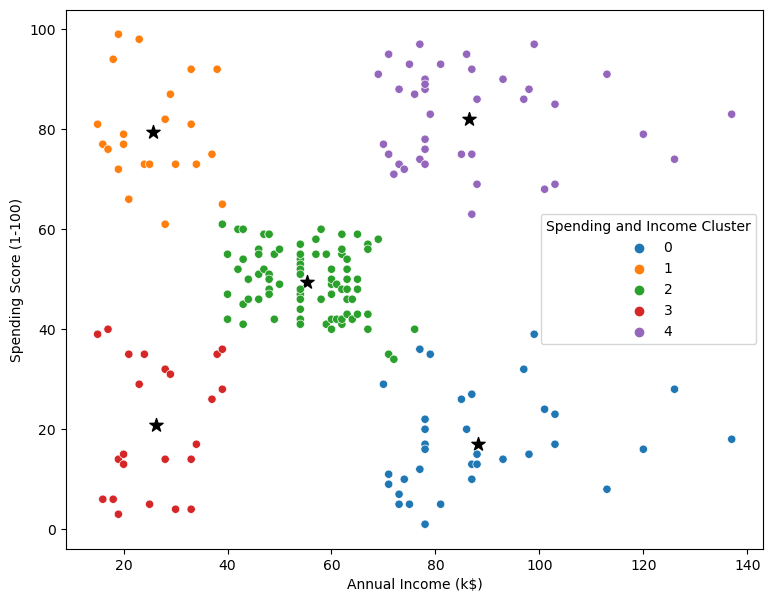

In [47]:
plt.figure(figsize=(9,7))
plt.scatter(x=cent["x"],y=cent['y'],s=100,c="black",marker="*")
sns.scatterplot(data=df_m,x="Annual Income (k$)",y="Spending Score (1-100)",hue="Spending and Income Cluster",palette="tab10")

In [50]:
pd.crosstab(df_m["Spending and Income Cluster"],df_m["Gender"],normalize="index")

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.590909,0.409091
2,0.592593,0.407407
3,0.608696,0.391304
4,0.538462,0.461538


In [52]:
df_m.groupby('Spending and Income Cluster')['Age',"Annual Income (k$)","Spending Score (1-100)"].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,25.272727,25.727273,79.363636
2,42.716049,55.296296,49.518519
3,45.217391,26.304348,20.913043
4,32.692308,86.538462,82.128205
